Please **submit this Jupyter notebook through Canvas** no later than **Friday December 14, 10:59**, before the start of the lecture.

The final project is in **groups of three**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

A single, jointly written report for each group is fine. All members in a group will receive the same grade.

# Exercise 0
Write down the names + student ID of the people in your group.

Anne Lohmeijer 10447555

Lukas Kiss 12457299

Steven Raaijmakers 10804242

----
# Project keywords
ODEs, time integration

----
# Project description
There is a wide variety of mathematical models for time-evolving systems formulated as sets of coupled ordinary differential equations (ODEs). Examples range from meteorology and population dynamics to celestial mechanics and chemical reactions. In many cases, these ODEs cannot be solved analytically, and instead they are simulated by means of numerical time integration. In this assignment we will explore various various time integration methods.



We consider a very simple system, one where we know the exact (analytical) solution so that we can easily compare results from numerical integration with the exact solution. The set of ODEs
$$\begin{array}{rcl}
\frac{dx}{dt} & = & y, \\
\frac{dy}{dt} & = & -\omega^2 \, x
\end{array}$$
are the equations for the $\textit{harmonic oscillator}$. This is a Hamiltonian system for which the Hamiltonian (or total energy) is given by $H=\tfrac12 (y^2 + \omega^2 \, x^2)$. 

----
# Project exercises
## Exercise 1
Read sections 9.1-9.3 from the book by Heath.



## Exercise 2
Solve the ODEs for the harmonic oscillator. Write down exact expressions for $x(t)$ and $y(t)$ given an arbitrary initial condition $x(t=0)=x_0, \, y(t=0)=y_0$. Make sure you solution is correct, as this will be your benchmark to compare numerical solutions against.



We have a set of two ODE's for the harmonic oscillator with Hamiltonian $H =\frac{1}{2}(y^2 + \omega^2 x^2)$:

$\dot{x} = y$

$\dot{y} = -\omega^2 x$

A general set of solutions for this set of ODE's is 

$x(t) = c_1 \cos(\omega t) + c_2 \sin(\omega t)$

$y(t) = c_2 \omega \cos(\omega t) - c_1 \omega \sin(\omega t)$

Then in order to fullfill the initial condition $x(t=0) = x_0$ we find $c_1 = x_0$, and to fullfill the initial condition $y(t=0) = y_0$ we find $c_2 = \frac{y_0}{\omega}$. Then the exact expression for $x(t)$ and $y(t)$ are 

$x(t) = x_0 \cos(\omega t) + \frac{y_0}{\omega} \sin(\omega t)$

$y(t) = y_0 \cos(\omega t) - x_0 \omega \sin(\omega t)$

Which satisfy the initial conditions and both ODE's.

## Exercise 3
Prove that the Hamiltonian is a conserved quantity, i.e. $H$ remains constant in time.



Using the set of solutions derived in Ex. 2, we can write out the Hamiltionian:

$H = \frac{1}{2}(y^2 + \omega^2 x^2) = \frac{1}{2}\left( y_o^2 \cos^2(\omega t) + x_0^2 \omega^2 \sin^2(\omega t) - 2 y_0 x_0 \omega \cos(\omega t)\sin(\omega t) + \omega^2 x_0^2 \cos(\omega t) + y_0^2 \sin^2 (\omega t) + 2 x_0 y_0 \cos (\omega t) \sin (\omega t) \right)$

$ \quad = \frac{1}{2} \left( y_0^2 \left( \cos^2(\omega t) + \sin^2(\omega t) \right) + x_0^2 \omega^2 \left( \cos^2(\omega t) + \sin^2(\omega t)\right) \right)$.

Now using the trigonometric identity $\sin^2(x) + \cos^2(x) = 1$, we obtain

$ H = \frac{1}{2} \left( y_0^2 + x_0^2 \omega^2) \right)$

Since $x_0$, $y_0$ and $\omega$ all are independent of time, we find that

$\dfrac{dH}{dt} = \dfrac{d}{dt}\left( \dfrac{1}{2} \left( y_0^2 + x_0^2 \omega^2 \right) \right) = 0$,

and thus that the Hamiltonian is a conserved quantity because it remains constant with time.

## Exercise 4
Set $\omega=1$. Use the forward Euler scheme to integrate the ODEs in time, from $t=0$ to $t=50$, with initial condition e.g. $(x_0,y_0)=(1,0)$. What is you time step $\Delta t$? Compare your numerical solution with the exact solution: make a plot of $x(t)$ versus $t$ for both solutions, and plot $H$ versus $t$. Pick a set of initial conditions (e.g. the corners of a square, $(x_0, y_0) = (1\pm 0.5, \pm 0.5)$), integrate these forward up to $t=10$, and plot the paths $(x(t),y(t))$. Compare with the exact solution.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['axes.grid'] = True

In [3]:
# constants (?)
OMEGA = 1
INIT = np.array([1.0, 0.0])
T_RANGE_50 = (0, 50)
T_RANGE_10 = (0, 10)

In [4]:
# exact functions
def xt(init, t, omega):
    return init[0]*np.cos(omega*t) + (init[1]*np.sin(omega*t))/omega

def yt(init, t, omega):
    return init[1]*np.cos(omega*t) - init[0]*omega*np.sin(omega*t)

# (given) derivations of functions
def dxdt(y):
    return y

def dydt(omega, x):
    return -np.power(omega,2) * x

# hamilton
def hamilton(x, y, omega):
    return 1/2. * (np.power(y,2) + np.power(omega,2) * np.power(x,2))

In [5]:
# This is our f for the harmonic oscillator
def f_(y, omega):
    return np.array([dxdt(y[1]), dydt(omega, y[0])])

In [6]:
# forward euler
def fwe(init, t_range, omega, f=f_, n=1000):
    t_start, t_end = t_range
    
    Ts, h = np.linspace(t_start, t_end, n, retstep=True)
    Vs = [init]
    
    for _ in Ts[1:]:
        Vs.append(Vs[-1] + h * f(Vs[-1], omega))

    return Ts, np.asarray(Vs), h

In [84]:
# Plotting function
def plot(init, t_range, omega=1, n=3000, visible=[1,1,1], f_integration=fwe):
    # labels    
    if f_integration.__name__ == "fwe":
        f_label = "forward Euler"
    elif f_integration.__name__ == "bwe":
        f_label = "backwards Euler"
    elif f_integration.__name__ == "RKm":
        f_label = "Runge-Kutta"
    elif f_integration.__name__ == "sv_scheme":
        f_label = "Stormer-Verlet"
    else:
        raise ValueError("Unknown integration function")
        
    # info     
    print("#"*100)
    print("Plot for params: init={}, omega={}, time_range={}, n={}".format(init, omega, t_range, n))

    Ts, xy, h = f_integration(init, t_range, omega, n=n)
    Ts_excact = np.linspace(Ts[0], Ts[-1],5000)
    print("Time step: " + str(h))
    
    v_X = np.vectorize(lambda t: xt(init, t, omega))
    v_Y = np.vectorize(lambda t: yt(init, t, omega))
    
    x = v_X(Ts_excact)
    y = v_Y(Ts_excact)
    
    #xt, yt over time    
    if visible[0] == 1:
        fig, ax = plt.subplots(1, 2, figsize=(14, 6))
        
        ax[0].plot(Ts, xy)
        ax[0].set_title("x(t) and y(t) from " + f_label + " integration.")
        ax[0].legend(["x(t)", "y(t)"])

        ax[1].plot(Ts_excact, list(zip(x,y)))
        ax[1].set_title("Exact x(t) and y(t)")
        ax[1].legend(["x(t)", "y(t)"])
        
        ax[0].set_ylim([-1.5, 1.5])
        ax[1].set_ylim([-1.5, 1.5])
        plt.show()
    
    # xt vs yt
    if visible[1] == 1:
        eX = xy[:,0]
        eY = xy[:,1]
        
        plt.title("x(t) vs y(t)")
        plt.plot(eX, eY, label=f_label + " integration")
        plt.plot(x, y, "r--", alpha=0.5, label="Exact solution")
        plt.xlabel("x(t)")
        plt.ylabel("y(t)")
        plt.xlim([-2, 2])
        plt.ylim([-2, 2])
        plt.legend()
        
        plt.show()
        
    # hamiltonian
    if visible[2] == 1:
        Eham = np.apply_along_axis(lambda ar : hamilton(ar[0],ar[1], omega), 1, xy)
        ham = np.apply_along_axis(lambda ar : hamilton(ar[0],ar[1], omega), 1, np.column_stack((x,y)))
        
        plt.title("Hamiltonian")
        
        plt.plot(Ts, Eham, label=f_label + " integration")
        plt.plot(Ts_excact, ham, "r--", alpha=0.5, label="Exact solution")
        
        plt.legend()
        
        plt.show()

####################################################################################################
Plot for params: init=[ 1.  0.], omega=1, time_range=(0, 50), n=3000
Time step: 0.0166722240747


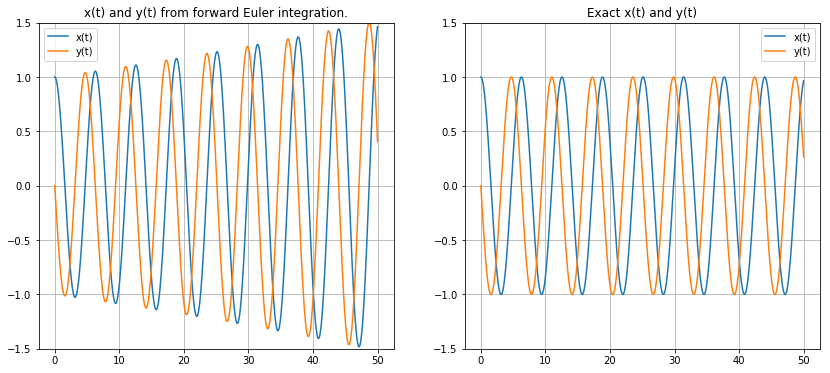

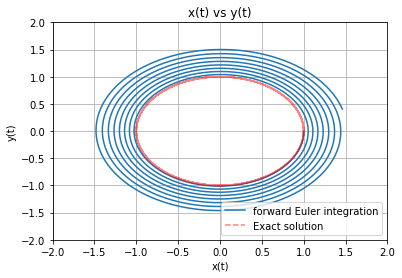

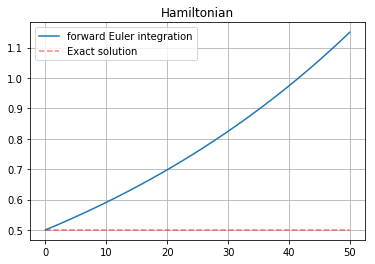

In [88]:
plot(INIT, (0, 50))

**Figure 1 - Forward Euler numerical and exact **

Upper-left the numerical integrated solution of the set of ODE's given earlier using the (forward) Euler method, using an initial condition of $(x_0, y_0) = (1, 0)$. $\omega = 1$ and in the time interval $t \in [0, 50]$ there are $n=3000$ integration steps taken with the Euler method, resulting in a time step of $\Delta t = 0.0167$.

Upper-right a plot of the exact solution of the same set of ODE's with the same initial condition. Mid-left a plot of $x(t)$ vs $y(t)$ for both the numerical and exact solution. This plot clearly visualizes the immediate stability of the exact solution, while the numerical integrated solution seems to increase in magnitude over time. A direct result of the increase in magnitude of $x(t)$ and $y(t)$ is shown in the total energy of the system, given by the Hamiltonian in the bottom-left figure.


####################################################################################################
Plot for params: init=[ 0.5  1.5], omega=1, time_range=(0, 10), n=100
Time step: 0.10101010101


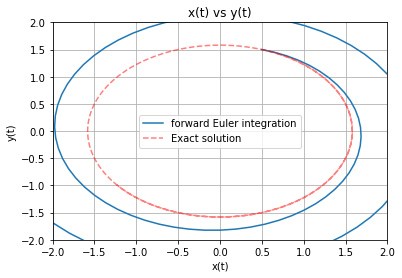

In [9]:
plot(np.array([0.5, 1.5]), T_RANGE_10, n=100, visible=[0,1,0])

####################################################################################################
Plot for params: init=[ 1.   0.5], omega=1, time_range=(0, 10), n=100
Time step: 0.10101010101


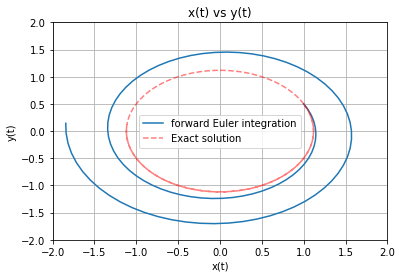

In [10]:
plot(np.array([1, 0.5]), T_RANGE_10, n=100, visible=[0,1,0])

####################################################################################################
Plot for params: init=[ 0.5   0.78], omega=1, time_range=(0, 10), n=100
Time step: 0.10101010101


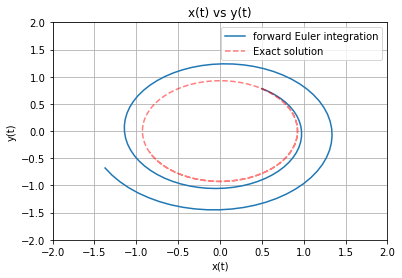

In [11]:
plot(np.array([0.5, 0.78]), T_RANGE_10, n=100, visible=[0,1,0])

**Figure 2 - Forward euler different stepsize**

Similar to Fig. 1, $x(t)$ vs $y(t)$ are plotted for both the forward Euler numerical integrated method and the exact solution, with different initial condtions $(x_0, y_0)$. In all cases we observe that the exact solution is stable whereas the numerical solution increases in magnitude over time. Moreover, the increase in magnitude over time of the numerical solution seems to have a linear relation with the initial condition, as shown in the upper figure. The increase of the Hamiltonian has to do with the error induced by the forward Euler method.

## Exercise 5
Experiment with changing the integration time step $\Delta t$. Assess the convergence by plotting the norm of the error (at some fixed time, e.g. $t=1$) versus $\Delta t$, over several orders of magnitude of $\Delta t$. Can you see that Euler's method is 1st order accurate?

In [12]:
def error(init, t_range, omega, f_integration=fwe):
    t_start, t_end = t_range
    ex_val = xt(init, t_end, omega) # exact value
    
    timesteps = []
    norm_err = []

    # do simulation 20 times on logscale
    for i in np.logspace(1, 5, 20):
        Ts, xy, h = f_integration(init, (0, t_end), omega, n=int(i))
        x_num = xy.T[0]
        num_val =x_num[len(x_num)-1] # this is at t = 1
        timesteps.append(h)
        norm_err.append(np.linalg.norm(np.array([ex_val, num_val])))
        
    return timesteps, norm_err

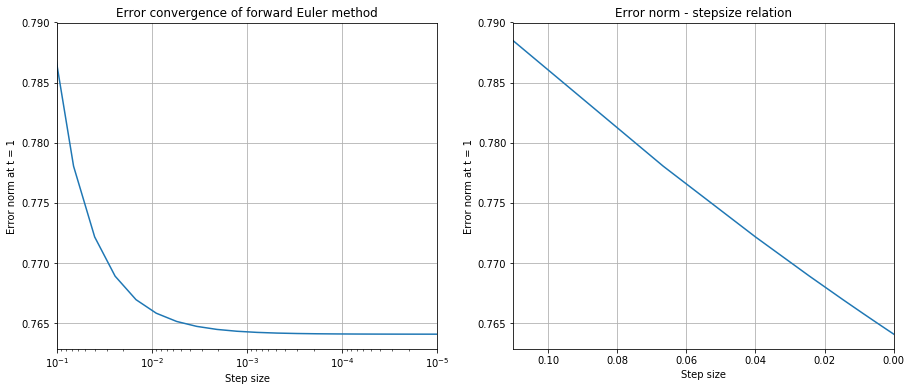

In [13]:
Ts, norm_err = error(INIT, (0, 1), OMEGA)

# draw convergence plot and 1st order accuracy plot
fig, ax = plt.subplots(1,2,figsize=(15, 6))
ax[0].semilogx(Ts, norm_err)
ax[0].set_xlim(1e-1, 1e-5)
ax[0].set_xlabel("Step size")
ax[0].set_ylabel("Error norm at t = 1")
ax[0].set_title("Error convergence of forward Euler method")

ax[1].plot(Ts, norm_err)
ax[1].set_xlim(0.11, 0)
ax[1].set_xlabel("Step size")
ax[1].set_ylabel("Error norm at t = 1")
ax[1].set_title("Error norm - stepsize relation")

plt.show()

**Figure 3 - Error behavior forward Euler method**

Relation between the stepsize used in the (forward) Euler method and the error norm between the numerical and exact value determined at $t = 1$, left on logarithmic scale and right on linear scale. The logarithmic scale on the left enables us to clearly observe the convergence of the error of the numerical method with respect to the exact solution as the stepsize decreases. Around a step size of $\Delta t \sim 10^{-3}$ the error seems to be quite stable. On the right the same data is plotted but on a linear axis, therewith clearly showing the linear relation. From the latter shown linear relation we also conclude that the Euler's method indeed  is 1st order accurate: its error decreases linearly with a decrease in step size.



## Exercise 6
Repeat the experiments above, but now with the backward Euler scheme.



The backward euler has the form:

$y_{n+1} = y_{n} + h \cdot f(t_{n+1}, y_{n+1})$

So, for example, once $y_{0}$ is given one can derive $y_{1}$, via:

$y_{1} = y_{0} + h \cdot f(t_{1}, y_{1})$

However this gives us a non-linear equation to solve since we don't know $y_1$. We can find the solution to this non-linear equation using a non-linear solver like scipy's fsolve. Fsolve finds the nd-root of a function given an nd-array. 

Since fsolve finds the roots, we need to rewrite our formula in such a way that it will return a value for $y_1$:

$y_1 - y_0 - h \cdot f(y_1) = 0$

In [59]:
from scipy.optimize import fsolve

# backwards euler
def bwe(init, t_range, omega, f=f_, n=1000):
    def helper(y1, y0, h, omega):
        return y1 - y0 - h * f(y1, omega)
    
    t_start, t_end = t_range
    Ts, h = np.linspace(t_start, t_end, n, retstep=True)
    Vs = [init]
    
    for _ in Ts[1:]:
        # use explicit euler for guess
        guess = Vs[-1] + h * f(Vs[-1], omega)
        Vs.append(fsolve(helper, guess, args=(Vs[-1], h, 1)))
        
    return Ts, np.asarray(Vs), h

####################################################################################################
Plot for params: init=[ 1.  0.], omega=1, time_range=(0, 50), n=3000
Time step: 0.0166722240747


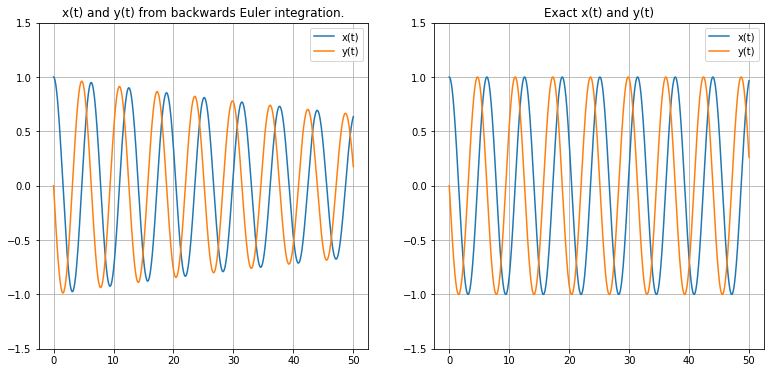

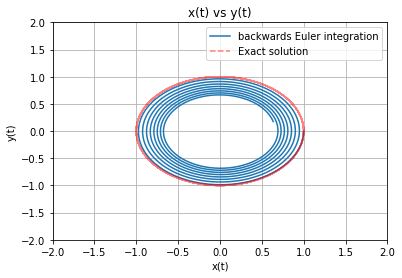

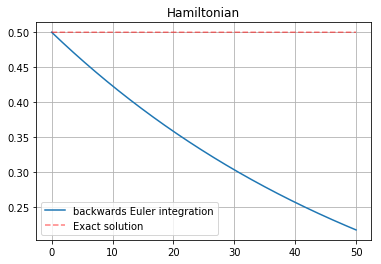

In [60]:
plot(INIT, T_RANGE_50, f_integration=bwe)

**Figure 4 - Backward Euler**

The same plots as Figure 1 but now with the back backward Euler integration method. Upper-left the numerical integrated solution of the set of ODE's using the initial condition $(x_0, y_0) = (1, 0)$. $\omega = 1$ and in the time interval $t \in [0, 50]$ there are $n=3000$ integration steps taken with the Euler method, resulting in a time step of $\Delta t = 0.0167$. Compared to the forward Euler, the magnitude of the numerical solution now decreases over time, therefore also the total energy of the system, as is observed in the bottom-left figure of showing the Hamiltonian. The behaviour of the exact solution obviously remains unchanged.

####################################################################################################
Plot for params: init=[ 0.5  1.5], omega=1, time_range=(0, 10), n=100
Time step: 0.10101010101


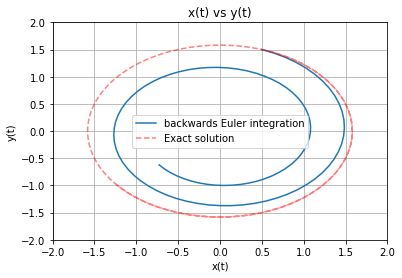

In [16]:
plot(np.array([0.5, 1.5]), T_RANGE_10, n=100, visible=[0,1,0], f_integration=bwe)

####################################################################################################
Plot for params: init=[ 1.   0.5], omega=1, time_range=(0, 10), n=100
Time step: 0.10101010101


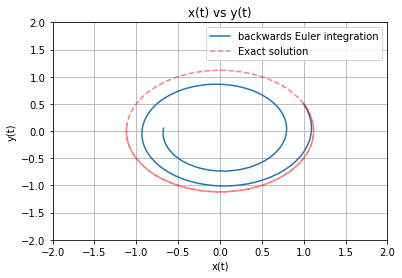

In [17]:
plot(np.array([1, 0.5]), T_RANGE_10, n=100, visible=[0,1,0], f_integration=bwe)

####################################################################################################
Plot for params: init=[ 0.5   0.78], omega=1, time_range=(0, 10), n=100
Time step: 0.10101010101


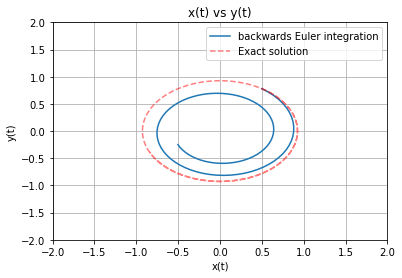

In [18]:
plot(np.array([0.5, 0.78]), T_RANGE_10, n=100, visible=[0,1,0], f_integration=bwe)

**Figure 5 - Backward euler different stepsize**

Similar to Fig. 4, $x(t)$ vs $y(t)$ are plotted for both the backward Euler numerical integrated method and the exact solution, with different initial condtions $(x_0, y_0)$. In all cases we observe that the exact solution is stable whereas the numerical solution decreases in magnitude over time. This al has to do with the integration method, contrary to the forward Euler the error now diverges into the circle. 



/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


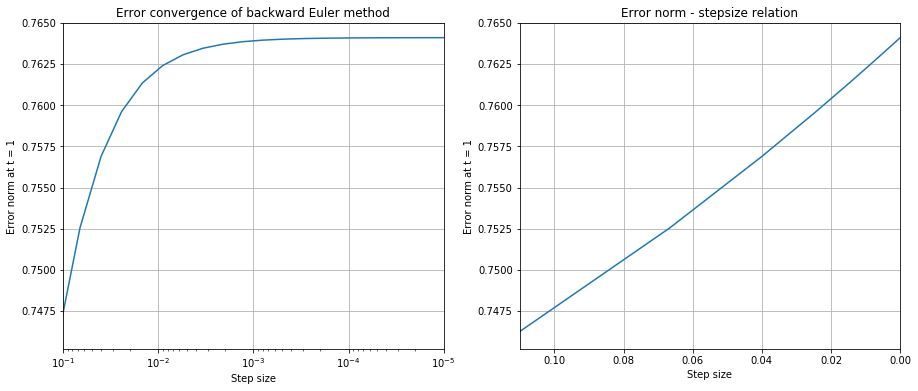

In [19]:
Ts, norm_err = error(INIT, (0, 1), OMEGA, f_integration=bwe)

# draw convergence plot and 1st order accuracy plot
fig, ax = plt.subplots(1,2,figsize=(15, 6))
ax[0].semilogx(Ts, norm_err)
ax[0].set_xlim(1e-1, 1e-5)
ax[0].set_xlabel("Step size")
ax[0].set_ylabel("Error norm at t = 1")
ax[0].set_title("Error convergence of backward Euler method")

ax[1].plot(Ts, norm_err)
ax[1].set_xlim(0.11, 0)
ax[1].set_xlabel("Step size")
ax[1].set_ylabel("Error norm at t = 1")
ax[1].set_title("Error norm - stepsize relation")

plt.show()

**Figure 6 - Error behavior of backward Euler method**

The error behavior of the backward Euler method, with the error norm between the numerical and exact solution at $t=1$, obtained by varying the step size of the integration. Similar to the forward Euler method we observe convergence of the error around $\Delta t \sim 10^{-3}$ in the left figure, and a first order acurracy of Euler's method by means of a linear relation between the step size and the error norm in the figure on the right.


## Exercise 7
Experiment with an integration schemes that gives higher order accuracy. Can you verify the order of accuracy with your numerical experiments? Does it conserve the Hamiltonian?



In [57]:
# The Runge–Kutta method
import functools as ft
def RKm(v, t_range, omega, n=1000):
    t_start, t_end = t_range
    Ts, h = np.linspace(t_start, t_end, n, retstep=True)
    Vs = [v]
    
    def fWrapper(pos, omega):
        return np.array([dxdt(pos[1]), dydt(omega, pos[0])])
    
    for _ in Ts[1:]:
        k1 = h*fWrapper(Vs[-1], omega)
        k2 = h*fWrapper(Vs[-1] + k1/2, omega)
        k3 = h*fWrapper(Vs[-1] + k2/2, omega)
        k4 = h*fWrapper(Vs[-1] + k3, omega)
        Vs.append(Vs[-1] + (1/6.)*(k1 + 2*k2 + 2*k3 + k4))
    
    return Ts, np.asarray(Vs), h

####################################################################################################
Plot for params: init=[ 1.  0.], omega=1, time_range=(0, 50), n=100
Time step: 0.505050505051


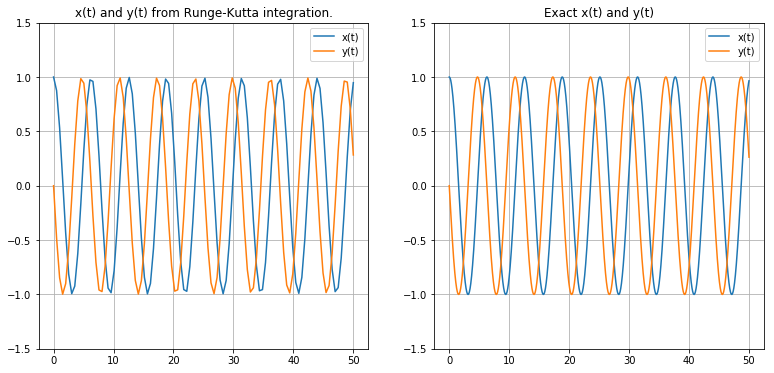

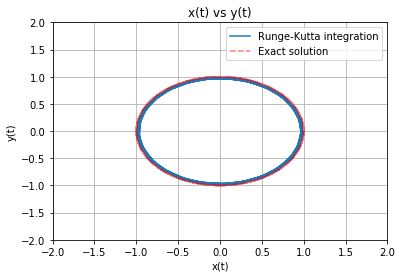

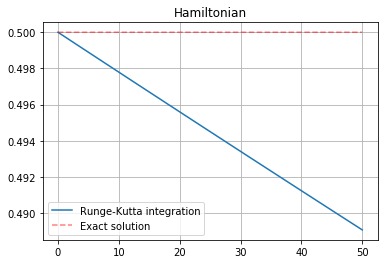

In [58]:
plot(INIT, T_RANGE_50, f_integration=RKm, n=100)

Runge–Kutta method is much more precise. With large timesteps, we can obtain still pretty high accuracy. This means that order of accuracy is 'better' then in the euler's methods. In the other hand, the Hamiltonian is not conserved. Total accumulated error is: $O(h^5)$


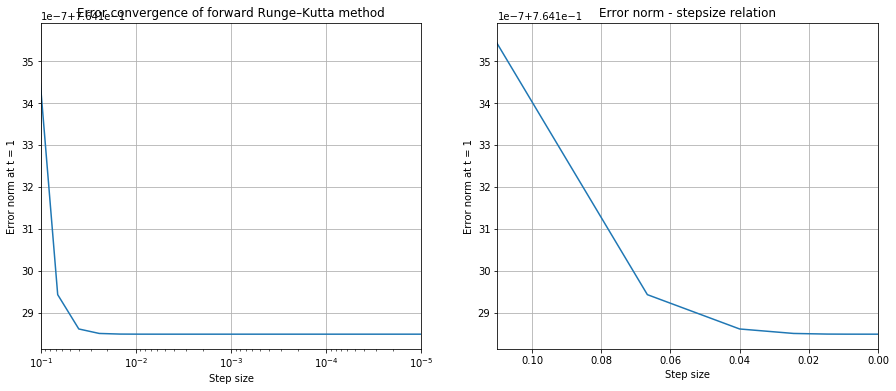

In [22]:
Ts, norm_err = error(INIT, (0, 1), OMEGA, f_integration=RKm)

# draw convergence plot and 1st order accuracy plot
fig, ax = plt.subplots(1,2,figsize=(15, 6))
ax[0].semilogx(Ts, norm_err)
ax[0].set_xlim(1e-1, 1e-5)
ax[0].set_xlabel("Step size")
ax[0].set_ylabel("Error norm at t = 1")
ax[0].set_title("Error convergence of forward Runge–Kutta method")

ax[1].plot(Ts, norm_err)
ax[1].set_xlim(0.11, 0)
ax[1].set_xlabel("Step size")
ax[1].set_ylabel("Error norm at t = 1")
ax[1].set_title("Error norm - stepsize relation")

plt.show()

## Exercise 8
It is far from trivial that a time integration method respects conservation properties of the systems of ODEs, such as energy conservation. The topic of $\textit{geometric numerical integration}$ deals with integration methods that are structure-preserving; preserving the Hamiltonian structure (and thereby the Hamiltonian itself) is one example.


The St\"{o}rmer -Verlet (SV) scheme preserves the symplectic structure of Hamiltonian systems. For a general set of ODEs given by $dx/dt = f(y), \,\, dy/dt = g(x)$, the SV scheme with time step $\Delta t$ reads
$$\begin{array}{rcl}
    y^* & = & y_k + \frac{1}{2} \Delta t \cdot g(x_k) \\
    x_{k+1} & = & x_k + \Delta t \cdot f(y^*) \\
    y_{k+1} & = & y^* + \frac{1}{2} \Delta t \cdot g(x_{k+1}).
\end{array}$$

Use this scheme to integrate the ODEs of the harmonic oscillator. Compare with the results from other integration schemes.

What happens with the Hamiltonian when using the SV scheme? What is the order of accuracy of the SV scheme?

In [68]:
def sv_scheme(init, t_range, omega=1, n=1000):    
    # maybe make a more general way to assign these functions
    fy = dxdt
    gx = dydt
    
    t_start, t_end = t_range
    Ts, h = np.linspace(t_start, t_end, n, retstep=True)
    Vs = [init]
    
    for _ in Ts[1:]:
        xk = Vs[-1][0]
        yk = Vs[-1][1]
        
        ystar = yk + 0.5 * h * gx(omega, xk)
        xkp1 = xk + h * fy(ystar)
        ykp1 = ystar + 0.5 * h * gx(omega, xkp1)
        
        Vs.append(np.array([xkp1, ykp1]))
        
    return Ts, np.asarray(Vs), h

####################################################################################################
Plot for params: init=[ 1.  0.], omega=1, time_range=(0, 50), n=3000
Time step: 0.0166722240747


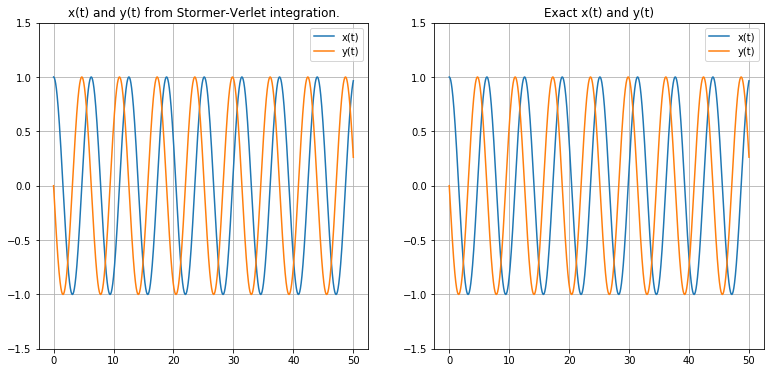

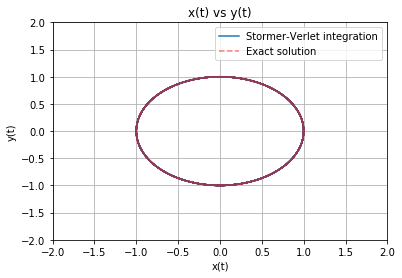

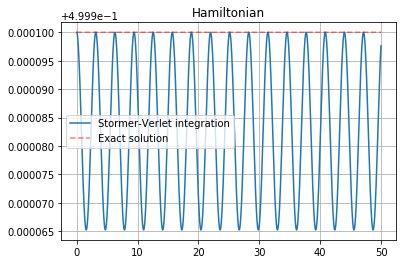

In [69]:
plot(INIT, T_RANGE_50, f_integration=sv_scheme)

In the plots above we can see that the using the SV integration we obtain a similar plot for $x$, $y$ over $t$ (just like with the forward/backward euler and the runge kutta). However in the plot with $x(t)$ vs $y(t)$ we can see that using the SV scheme for integration the formulas gives us a solution that is really close to the exact solution.

In the plot of the hamilton we can see that the SV integration is oscilating. However, it is oscilating very close to the exact solution and therefore is the best approximation of the hamiltonian thus far.

Using the SV scheme gives the solutions that are the closest to the exact solutions, which is due to the fact (as mentioned before) that the SVscheme preserves the symplectic structure.

In [89]:
SOMETHING ABOUT THE ORDER OF ACCURACY HERE (?)

SyntaxError: invalid syntax (<ipython-input-89-87476d407328>, line 1)